In [7]:
import pandas as pd
import numpy as np
import requests
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
from pathlib import Path

notebook_path = os.path.join(os.getcwd())
data_path = Path(notebook_path).parent.joinpath('data')

# Read data
df = pd.read_csv(data_path / 'wildfires_with_geocoord.csv', parse_dates=True)

# some data wrangling
df['month'] = pd.to_datetime(df.alarm_date).dt.month
df.dropna(subset='month', inplace=True)
grouped = df.groupby(['month', 'cause']).count()
grouped.reset_index(inplace=True)
grouped = grouped[['month', 'cause', 'agency']]
grouped.columns = ['month', 'cause', 'count']
grouped
grouped.to_csv(data_path / 'wildfires_grouped_task4_2.csv', index=False)


In [8]:
df_4_2 = pd.read_csv(data_path / 'wildfires_grouped_task4_2.csv')
order = df_4_2.groupby('cause').sum().sort_values('count', ascending=False)
order_list = order.index.to_list()

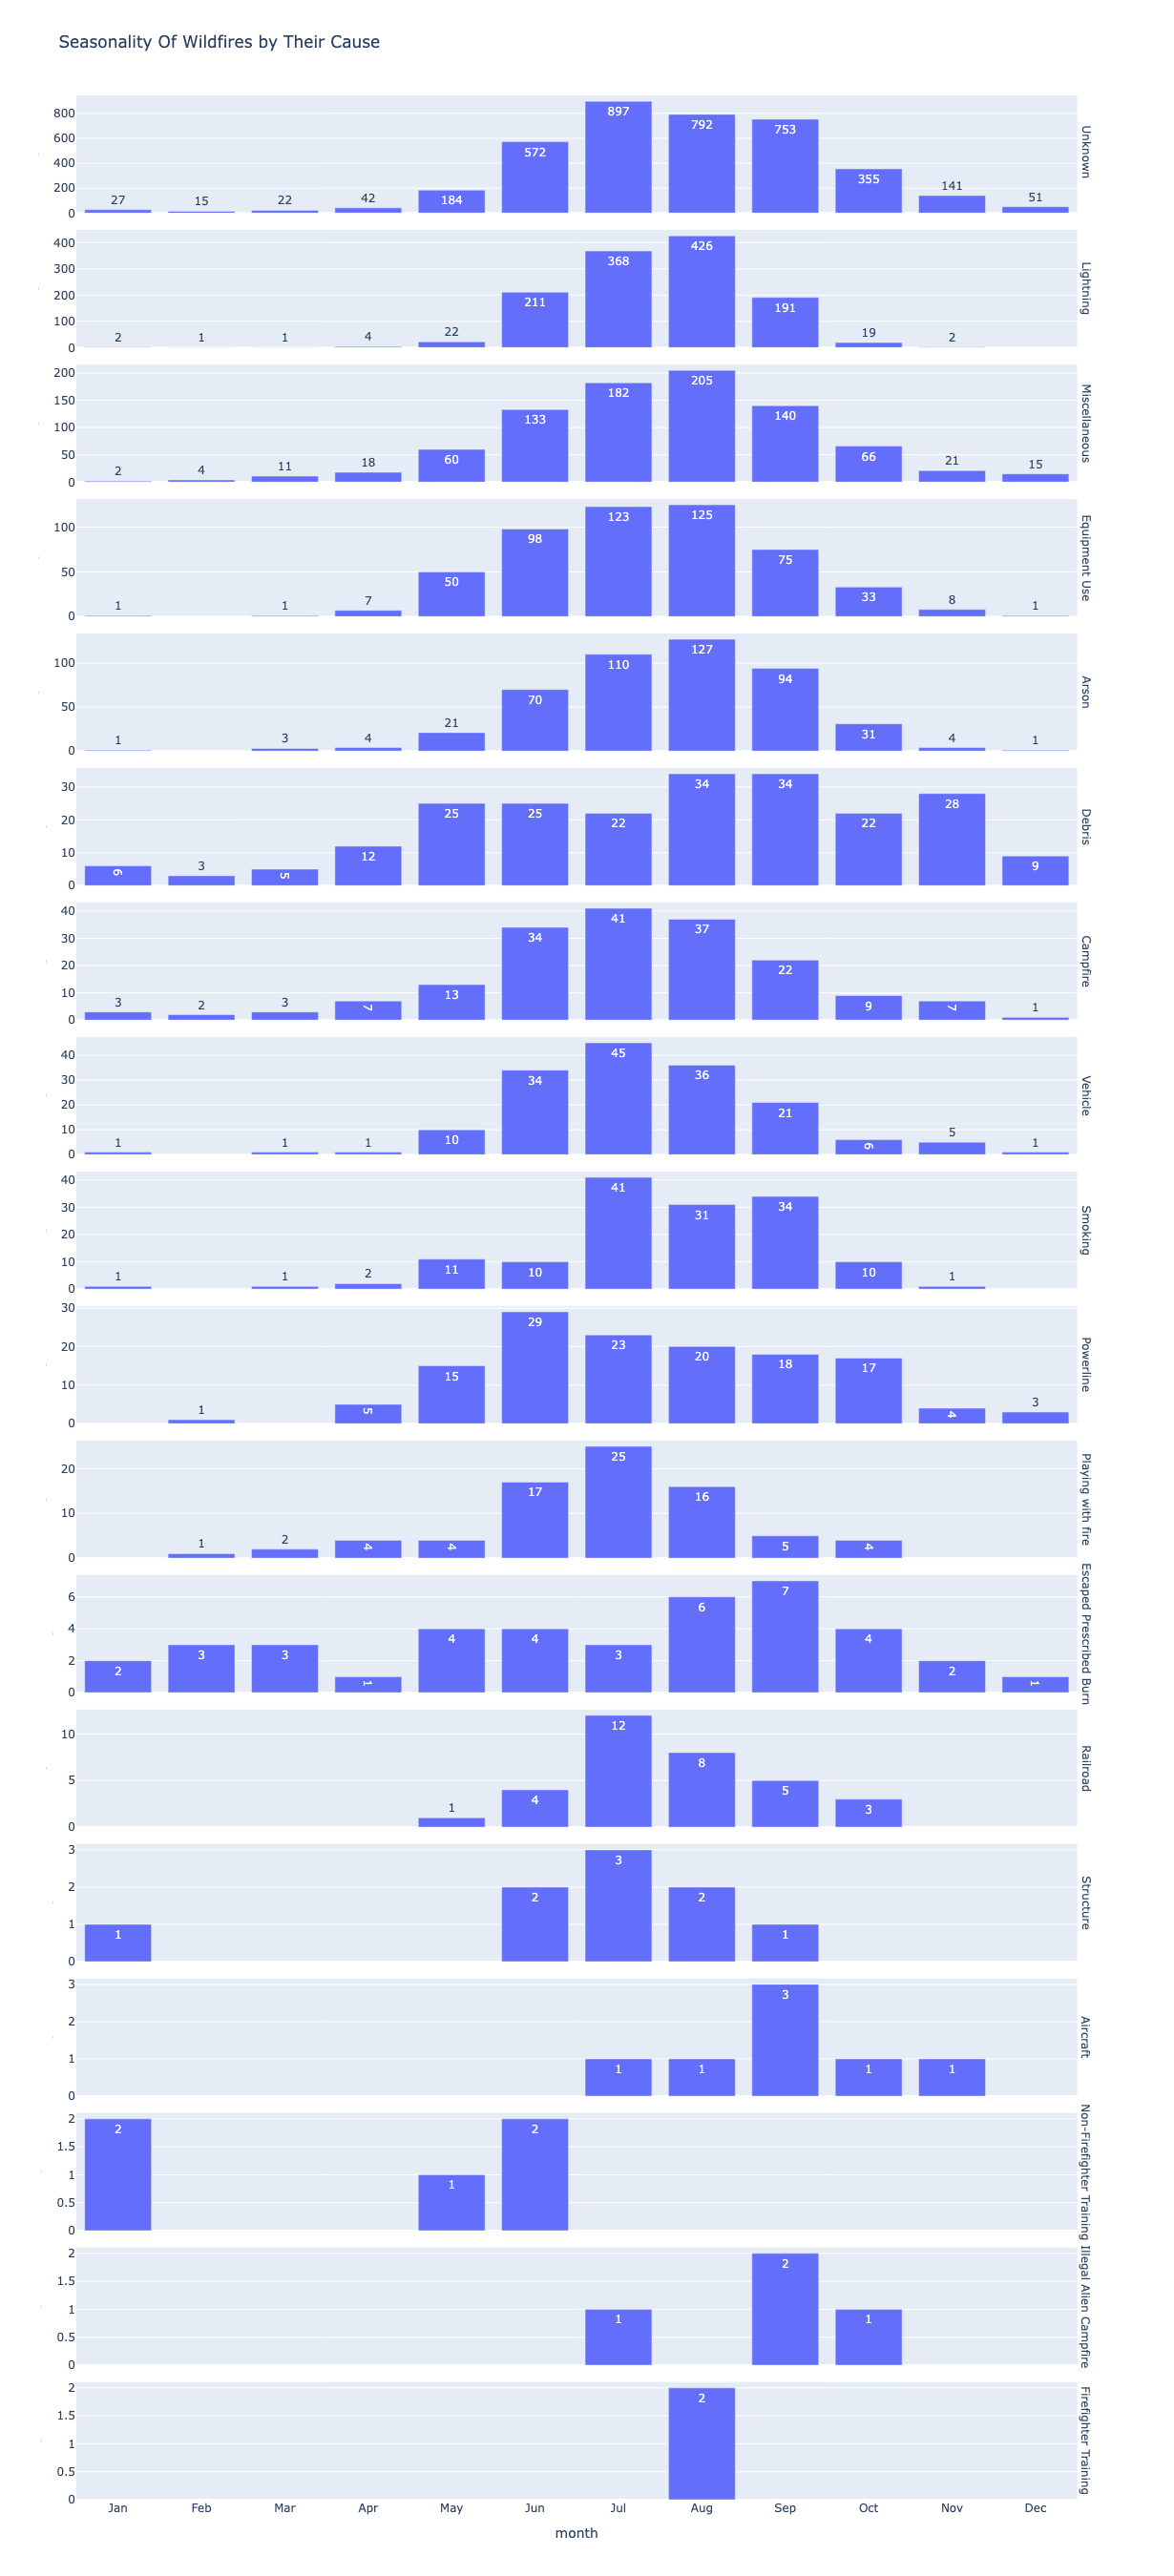

In [9]:
fig_4_2 = px.bar(df_4_2, x="month", y="count", title="Seasonality Of Wildfires by Their Cause",
            facet_row='cause', 
            facet_col_wrap=1,
            facet_row_spacing=0.007,
            height=2700,
            width=1000,
            text_auto=True,
            category_orders={'cause': order_list},
            )
fig_4_2.update_xaxes(tickvals=np.arange(1,13), ticktext=['Jan', 'Feb', 'Mar',
                                                   'Apr', 'May', 'Jun',
                                                   'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'])
fig_4_2.update_yaxes(title_font={'size':1})
xaxis = go.layout.YAxis(
        tickangle = 45)
fig_4_2.for_each_annotation(lambda a: a.update(text=a.text.split("- ")[1].split("/")[0]))
fig_4_2.update_yaxes(matches=None)

fig_4_2.show()

/var/folders/xf/h_7q5x7d77lfdvd232_h4rzm0000gn/T/ipykernel_1463/2630132772.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



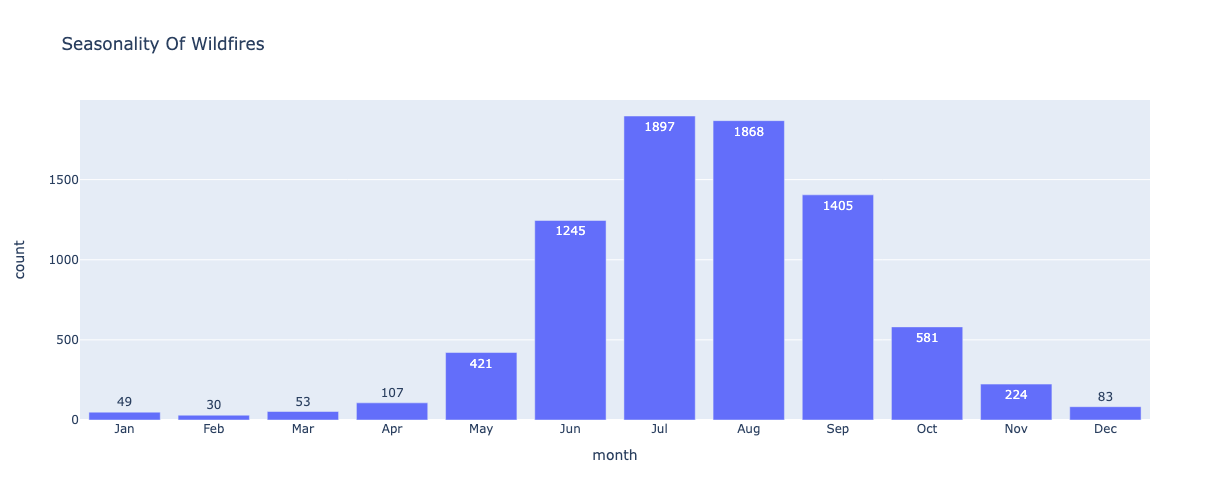

In [10]:
# some data wrangling
df_4_1 = pd.read_csv(data_path / 'wildfires_grouped_task4_2.csv')
df_4_1 = df_4_2.groupby('month').sum()
df_4_1.reset_index(inplace=True)
df_4_1.to_csv(data_path / 'wildfires_grouped_task4_1.csv', index=False)
df_4_1 = pd.read_csv(data_path / 'wildfires_grouped_task4_1.csv')
fig_4_1 = px.bar(df_4_1, x="month", y="count", title="Seasonality Of Wildfires",
            height=500,
            width=1000,
            text_auto=True,
            category_orders={'cause': order_list},
            )
fig_4_1.update_xaxes(tickvals=np.arange(1,13), ticktext=['Jan', 'Feb', 'Mar',
                                                   'Apr', 'May', 'Jun',
                                                   'Jul', 'Aug', 'Sep',
                                                   'Oct', 'Nov', 'Dec'])

fig_4_1.show()